In [6]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [7]:
#combining no of csv file into one file with name combine_csv
os.chdir('D:\TESTTT')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
df

,AP1RTT,AP1STDEV,AP1RSS,AP2RTT,AP2STDEV,AP2RSS,AP3RTT,AP3STDEV,AP3RSS,x,y
0,7.789,0.371,-61.0,1.311,0.082,-47,11.037,1.192,-74,1,1
1,7.731,0.277,-61.0,0.999,0.186,-47,10.452,0.256,-72,1,1
2,7.731,0.442,-61.0,1.155,0.171,-47,9.368,0.661,-69,1,1
3,7.672,0.698,-62.0,1.194,0.206,-47,9.709,1.533,-67,1,1
4,7.643,2.609,-63.0,1.038,0.151,-46,9.748,2.350,-70,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1115,7.232,0.465,-60.0,12.825,0.293,-72,0.491,0.989,-51,6,8
1116,6.969,1.224,-62.0,13.528,0.637,-71,0.569,0.938,-51,6,8
1117,6.764,2.843,-64.0,11.389,1.182,-69,0.608,0.874,-51,6,8
1118,6.241,0.865,-54.0,10.178,0.968,-67,0.373,1.017,-51,6,8


In [8]:
df.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)

In [9]:
df1=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'],square_RTT1=df['AP1RTT']*df['AP1RTT'],square_RTT2=df['AP2RTT']*df['AP2RTT'],square_RTT3=df['AP3RTT']*df['AP3RTT'])
df1

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y,Product_RTT,Product_RTT12,Product_RTT23,Product_RTT13,square_RTT1,square_RTT2,square_RTT3
0,7.789,0.371,1.311,0.082,11.037,1.192,1,1,112.702990,10.211379,14.469507,85.967193,60.668521,1.718721,121.815369
1,7.731,0.277,0.999,0.186,10.452,0.256,1,1,80.723608,7.723269,10.441548,80.804412,59.768361,0.998001,109.244304
2,7.731,0.442,1.155,0.171,9.368,0.661,1,1,83.649729,8.929305,10.820040,72.424008,59.768361,1.334025,87.759424
3,7.672,0.698,1.194,0.206,9.709,1.533,1,1,88.938013,9.160368,11.592546,74.487448,58.859584,1.425636,94.264681
4,7.643,2.609,1.038,0.151,9.748,2.350,1,1,77.335115,7.933434,10.118424,74.503964,58.415449,1.077444,95.023504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,7.232,0.465,12.825,0.293,0.491,0.989,6,8,45.540446,92.750400,6.297075,3.550912,52.301824,164.480625,0.241081
1116,6.969,1.224,13.528,0.637,0.569,0.938,6,8,53.643404,94.276632,7.697432,3.965361,48.566961,183.006784,0.323761
1117,6.764,2.843,11.389,1.182,0.608,0.874,6,8,46.837399,77.035196,6.924512,4.112512,45.751696,129.709321,0.369664
1118,6.241,0.865,10.178,0.968,0.373,1.017,6,8,23.693295,63.520898,3.796394,2.327893,38.950081,103.591684,0.139129


In [10]:


# group the data by x and y values, and calculate the mean of each group
groupedd = df1.groupby(['x', 'y']).mean()
groupedd

AP1RTT  AP1STDEV     AP2RTT  AP2STDEV     AP3RTT  AP3STDEV  \
x y                                                                  
1 1   7.693770  1.641391   1.047655  0.139770  10.636950  1.639302   
  2   7.333815  1.875619   2.086338  1.564356   9.914421  0.902763   
  3   5.546007  1.085452   2.944522  0.307651   8.704814  0.446138   
  4   5.184751  0.527325   2.990953  0.265784  11.100585  0.279479   
  5   3.823379  0.674729   4.384745  0.559962   7.107430  1.735070   
  6   4.937896  0.457527   7.448349  0.141877   6.071552  0.280645   
  7   2.666296  2.247298   6.658781  1.613594   7.167089  0.935937   
  8   1.183541  0.305051  10.093483  0.168583   5.702837  1.047550   
2 1   7.948030  0.173625   2.460408  0.892426  11.003856  0.625727   
  2   6.587681  1.826832   3.445230  0.191153   9.123719  1.475566   
  3   6.009807  0.363989   3.739489  0.123006   7.659212  0.268668   
  4   4.424475  0.686528   5.426049  0.789173   7.632363  0.936212   
  5   4.299385  0.443971   5.072234  1.411651   6.846428  1.075028   
  6   3.687707  0.732968   5.848750  0.550600   4.428849  0.739665   
  7   4.073585  0.754792   6.873887  0.536805   5.810397  0.621389   
  8   4.330946  0.324136   8.905332  0.241711   4.557246  1.041326   
3 1   8.156050  1.323303   3.621825  1.153837   9.773460  0.759790   
  2   7.264119  1.169910   3.701493  0.312193   8.458308  0.500600   
  3   7.325952  0.476910   4.078035  0.436916   7.794636  0.204207   
  4   4.992813  0.884000   4.976851  0.932436   6.701715  2.101213   
  8   3.667494  0.881071   8.719328  1.674234   4.560380  0.353798   
4 1   9.811579  0.713093   5.702643  1.909094  11.426823  1.446279   
  2   7.642586  1.121497   4.844368  0.760211   7.916312  0.938768   
  3   6.961511  1.319981   5.065048  1.945964   9.525934  0.227320   
  5   5.301555  0.749012   6.701339  0.195826   5.311839  1.074349   
  6   5.730509  1.150577   6.932043  0.313365   3.561937  0.813032   
  7   6.459386  0.316007   7.796895  0.272207   3.354515  0.333453   
  8   7.463367  1.144228  11.326389  0.301170   3.884723  0.649600   
5 1  11.424319  0.740196   5.909696  1.176276   8.650244  0.684356   
  2   9.308035  0.802348   5.555224  0.215140   9.200151  0.922926   
  3   9.271368  0.609722   5.791750  1.450368   7.421827  1.628623   
  7   6.383980  0.622789   7.880703  0.721863   2.726238  0.203961   
  8   8.405294  0.466520   9.467609  0.144156   1.816103  1.389601   
6 1  10.126998  1.083141   5.960008  0.146637   9.407276  0.130872   
  2  10.423953  0.404272   7.149533  0.475469   9.872498  0.469246   
  3   9.299548  0.309113   9.070805  0.877549   7.158336  0.403543   
  7   5.746741  0.887730   9.734885  0.861668   1.909856  0.156536   
  8   7.175671  0.491054  11.201030  0.343712   0.477205  0.981584   

     Product_RTT  Product_RTT12  Product_RTT23  Product_RTT13  square_RTT1  \
x y                                                                          
1 1    85.732571       8.060321      11.143077      81.839439    59.222043   
  2   151.693146      15.300669      20.684244      72.710576    53.884550   
  3   142.177138      16.330036      25.634647      48.280187    30.885033   
  4   172.241706      15.507978      33.205880      57.576870    26.961720   
  5   119.163541      16.766789      31.163644      27.173744    14.692064   
  6   223.416964      36.781746      45.224096      29.992713    24.660522   
  7   127.188672      17.749157      47.712822      19.110219     7.171697   
  8    68.130177      11.945531      57.556441       6.750785     1.423893   
2 1   215.031537      19.556251      27.059570      87.439305    63.190301   
  2   207.136589      22.697381      31.441350      60.104060    43.433427   
  3   172.131395      22.473663      28.641518      46.030641    36.167117   
  4   183.238471      24.008022      41.413410      33.769443    19.593407   
  5   149.336633      21.812069      34.726066      29.436367    18.726645   
  6    95.503026      21.565510      

In [11]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped

,x,y,AP1RTT_min,AP1RTT_max,AP1RTT_<lambda_0>,AP1RTT_<lambda_1>,AP1RTT_<lambda_2>,AP1STDEV_min,AP1STDEV_max,AP1STDEV_<lambda_0>,...,square_RTT3_max,square_RTT3_<lambda_0>,square_RTT3_<lambda_1>,square_RTT3_<lambda_2>,A_P_1_R_T_T,A_P_1_S_T_D_E_V,A_P_2_R_T_T,A_P_2_S_T_D_E_V,A_P_3_R_T_T,A_P_3_S_T_D_E_V
0,1,1,7.203,9.781,7.61300,7.6720,7.760,0.040,2.875,0.89950,...,324.360100,108.430569,111.703761,114.190596,7.693770,1.641391,1.047655,0.139770,10.636950,1.639302
1,1,2,5.499,13.648,7.26200,7.3200,7.408,0.000,4.465,1.45800,...,107.412496,95.609284,98.485776,101.425041,7.333815,1.875619,2.086338,1.564356,9.914421,0.902763
2,1,3,4.918,8.467,5.44500,5.4840,5.562,0.129,2.676,0.97700,...,91.259809,73.051209,75.082225,79.192201,5.546007,1.085452,2.944522,0.307651,8.704814,0.446138
3,1,4,3.492,7.009,5.06400,5.1520,5.289,0.052,3.296,0.16500,...,194.267844,125.731369,127.712601,128.822500,5.184751,0.527325,2.990953,0.265784,11.100585,0.279479
4,1,5,2.491,4.391,3.60900,3.8630,4.068,0.000,2.299,0.18500,...,80.766169,50.154724,50.580544,50.993881,3.823379,0.674729,4.384745,0.559962,7.107430,1.735070
5,1,6,2.789,6.148,4.54700,4.8300,5.357,0.052,2.680,0.19800,...,46.498761,35.976004,36.929929,37.884025,4.937896,0.457527,7.448349,0.141877,6.071552,0.280645
6,1,7,1.734,8.199,2.59400,2.6330,2.711,0.000,2.968,2.20600,...,79.709184,50.851161,51.408900,51.969681,2.666296,2.247298,6.658781,1.613594,7.167089,0.935937
7,1,8,0.342,2.555,1.10900,1.1880,1.256,0.000,2.212,0.13800,...,57.760000,31.561924,32.216976,32.890225,1.183541,0.305051,10.093483,0.168583,5.702837,1.047550
8,2,1,7.516,8.444,7.86700,7.9450,8.053,0.000,1.115,0.09500,...,166.745569,106.812225,114.190596,137.851081,7.948030,0.173625,2.460408,0.892426,11.003856,0.625727
9,2,2,6.266,8.414,6.50000,6.5780,6.656,0.841,2.616,1.74000,...,212.634724,74.909025,76.947984,80.407089,6.587681,1.826832,3.445230,0.191153,9.123719,1.475566


In [12]:
new_name={'AP1RTT_<lambda_0>': 'AP1RTT_25','AP2RTT_<lambda_0>': 'AP2RTT_25','AP3RTT_<lambda_0>': 'AP3RTT_25',
          'AP1RTT_<lambda_1>': 'AP1RTT_50','AP2RTT_<lambda_1>': 'AP2RTT_50','AP3RTT_<lambda_1>': 'AP3RTT_50',
          'AP1RTT_<lambda_2>': 'AP1RTT_75','AP2RTT_<lambda_2>': 'AP2RTT_75','AP3RTT_<lambda_2>': 'AP3RTT_75',
          'AP1RSS_<lambda_0>': 'AP1RSS_25','AP2RSS_<lambda_0>': 'AP2RSS_25','AP3RSS_<lambda_0>': 'AP3RSS_25',
          'AP1RSS_<lambda_1>': 'AP1RSS_50','AP2RSS_<lambda_1>': 'AP2RSS_50','AP3RSS_<lambda_1>': 'AP3RSS_50',
          'AP1RSS_<lambda_2>': 'AP1RSS_75','AP2RSS_<lambda_2>': 'AP2RSS_75','AP3RSS_<lambda_2>': 'AP3RSS_75',
        
          'Product_RTT<lambda_0>': 'ProductRTT_25','Product_RTT12<lambda_0>':'ProductRTT12_25','Product_RTT23<lambda_0>':'ProductRTT23_25','Product_RTT13<lambda_0>':'ProductRTT13_25',
          'Product_RTT<lambda_1>': 'ProductRTT_50','Product_RTT12<lambda_1>':'ProductRTT12_50','Product_RTT23<lambda_1>':'ProductRTT23_50','Product_RTT13<lambda_1>':'ProductRTT13_50',
          'Product_RTT<lambda_2>': 'ProductRTT_75','Product_RTT12<lambda_2>':'ProductRTT12_75','Product_RTT23<lambda_2>':'ProductRTT23_75','Product_RTT13<lambda_2>':'ProductRTT13_75',
          
          'square_RTT1<lambda_0>': 'square_RTT1_25','square_RTT2<lambda_0>': 'square_RTT2_25','square_RTT3<lambda_0>': 'square_RTT3_25',
         'square_RTT1<lambda_1>': 'square_RTT1_50','square_RTT2<lambda_1>': 'square_RTT2_50','square_RTT3<lambda_1>': 'square_RTT3_50',
          'square_RTT1<lambda_2>': 'square_RTT1_75','square_RTT2<lambda_2>': 'square_RTT2_75','square_RTT3<lambda_2>': 'square_RTT3_75',
          
          
          
             
          'AP1STDEV_<lambda_0>':'AP1STDEV_25','AP2STDEV_<lambda_0>':'AP2STDEV_25','AP3STDEV_<lambda_0>':'AP3STDEV_25',
          'AP1STDEV_<lambda_1>':'AP1STDEV_50','AP2STDEV_<lambda_1>':'AP2STDEV_50','AP3STDEV_<lambda_1>':'AP3STDEV_50',
          'AP1STDEV_<lambda_2>':'AP1STDEV_75','AP2STDEV_<lambda_2>':'AP2STDEV_75','AP3STDEV_<lambda_2>':'AP3STDEV_75',
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP1STDEV_MEAN','A_P_3_S_T_D_E_V':'AP1STDEV_MEAN'}
grouped.rename(columns=new_name,inplace=True)
grouped

,x,y,AP1RTT_min,AP1RTT_max,AP1RTT_25,AP1RTT_50,AP1RTT_75,AP1STDEV_min,AP1STDEV_max,AP1STDEV_25,...,square_RTT3_max,square_RTT3_<lambda_0>,square_RTT3_<lambda_1>,square_RTT3_<lambda_2>,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP1STDEV_MEAN,AP3RTT_MEAN,AP1STDEV_MEAN
0,1,1,7.203,9.781,7.61300,7.6720,7.760,0.040,2.875,0.89950,...,324.360100,108.430569,111.703761,114.190596,7.693770,1.641391,1.047655,0.139770,10.636950,1.639302
1,1,2,5.499,13.648,7.26200,7.3200,7.408,0.000,4.465,1.45800,...,107.412496,95.609284,98.485776,101.425041,7.333815,1.875619,2.086338,1.564356,9.914421,0.902763
2,1,3,4.918,8.467,5.44500,5.4840,5.562,0.129,2.676,0.97700,...,91.259809,73.051209,75.082225,79.192201,5.546007,1.085452,2.944522,0.307651,8.704814,0.446138
3,1,4,3.492,7.009,5.06400,5.1520,5.289,0.052,3.296,0.16500,...,194.267844,125.731369,127.712601,128.822500,5.184751,0.527325,2.990953,0.265784,11.100585,0.279479
4,1,5,2.491,4.391,3.60900,3.8630,4.068,0.000,2.299,0.18500,...,80.766169,50.154724,50.580544,50.993881,3.823379,0.674729,4.384745,0.559962,7.107430,1.735070
5,1,6,2.789,6.148,4.54700,4.8300,5.357,0.052,2.680,0.19800,...,46.498761,35.976004,36.929929,37.884025,4.937896,0.457527,7.448349,0.141877,6.071552,0.280645
6,1,7,1.734,8.199,2.59400,2.6330,2.711,0.000,2.968,2.20600,...,79.709184,50.851161,51.408900,51.969681,2.666296,2.247298,6.658781,1.613594,7.167089,0.935937
7,1,8,0.342,2.555,1.10900,1.1880,1.256,0.000,2.212,0.13800,...,57.760000,31.561924,32.216976,32.890225,1.183541,0.305051,10.093483,0.168583,5.702837,1.047550
8,2,1,7.516,8.444,7.86700,7.9450,8.053,0.000,1.115,0.09500,...,166.745569,106.812225,114.190596,137.851081,7.948030,0.173625,2.460408,0.892426,11.003856,0.625727
9,2,2,6.266,8.414,6.50000,6.5780,6.656,0.841,2.616,1.74000,...,212.634724,74.909025,76.947984,80.407089,6.587681,1.826832,3.445230,0.191153,9.123719,1.475566


In [13]:
new_name={'AP1RTT_<lambda_0>': 'AP1RTT_25','AP2RTT_<lambda_0>': 'AP2RTT_25','AP3RTT_<lambda_0>': 'AP3RTT_25',
          'AP1RTT_<lambda_1>': 'AP1RTT_50','AP2RTT_<lambda_1>': 'AP2RTT_50','AP3RTT_<lambda_1>': 'AP3RTT_50',
          'AP1RTT_<lambda_2>': 'AP1RTT_75','AP2RTT_<lambda_2>': 'AP2RTT_75','AP3RTT_<lambda_2>': 'AP3RTT_75',
          
          'Product_RTT<lambda_0>': 'ProductRTT_25','Product_RTT12<lambda_0>':'ProductRTT12_25','Product_RTT23<lambda_0>':'ProductRTT23_25','Product_RTT13<lambda_0>':'ProductRTT13_25',
          'Product_RTT<lambda_1>': 'ProductRTT_50','Product_RTT12<lambda_1>':'ProductRTT12_50','Product_RTT23<lambda_1>':'ProductRTT23_50','Product_RTT13<lambda_1>':'ProductRTT13_50',
          'Product_RTT<lambda_2>': 'ProductRTT_75','Product_RTT12<lambda_2>':'ProductRTT12_75','Product_RTT23<lambda_2>':'ProductRTT23_75','Product_RTT13<lambda_2>':'ProductRTT13_75',
          
          'AP1STDEV_<lambda_0>':'AP1STDEV_25','AP2STDEV_<lambda_0>':'AP2STDEV_25','AP3STDEV_<lambda_0>':'AP3STDEV_25',
          'AP1STDEV_<lambda_1>':'AP1STDEV_50','AP2STDEV_<lambda_1>':'AP2STDEV_50','AP3STDEV_<lambda_1>':'AP3STDEV_50',
          'AP1STDEV_<lambda_2>':'AP1STDEV_75','AP2STDEV_<lambda_2>':'AP2STDEV_75','AP3STDEV_<lambda_2>':'AP3STDEV_75',
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP1STDEV_MEAN','A_P_3_S_T_D_E_V':'AP1STDEV_MEAN'}
grouped.rename(columns=new_name,inplace=True)
grouped

,x,y,AP1RTT_min,AP1RTT_max,AP1RTT_25,AP1RTT_50,AP1RTT_75,AP1STDEV_min,AP1STDEV_max,AP1STDEV_25,...,square_RTT3_max,square_RTT3_<lambda_0>,square_RTT3_<lambda_1>,square_RTT3_<lambda_2>,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP1STDEV_MEAN,AP3RTT_MEAN,AP1STDEV_MEAN
0,1,1,7.203,9.781,7.61300,7.6720,7.760,0.040,2.875,0.89950,...,324.360100,108.430569,111.703761,114.190596,7.693770,1.641391,1.047655,0.139770,10.636950,1.639302
1,1,2,5.499,13.648,7.26200,7.3200,7.408,0.000,4.465,1.45800,...,107.412496,95.609284,98.485776,101.425041,7.333815,1.875619,2.086338,1.564356,9.914421,0.902763
2,1,3,4.918,8.467,5.44500,5.4840,5.562,0.129,2.676,0.97700,...,91.259809,73.051209,75.082225,79.192201,5.546007,1.085452,2.944522,0.307651,8.704814,0.446138
3,1,4,3.492,7.009,5.06400,5.1520,5.289,0.052,3.296,0.16500,...,194.267844,125.731369,127.712601,128.822500,5.184751,0.527325,2.990953,0.265784,11.100585,0.279479
4,1,5,2.491,4.391,3.60900,3.8630,4.068,0.000,2.299,0.18500,...,80.766169,50.154724,50.580544,50.993881,3.823379,0.674729,4.384745,0.559962,7.107430,1.735070
5,1,6,2.789,6.148,4.54700,4.8300,5.357,0.052,2.680,0.19800,...,46.498761,35.976004,36.929929,37.884025,4.937896,0.457527,7.448349,0.141877,6.071552,0.280645
6,1,7,1.734,8.199,2.59400,2.6330,2.711,0.000,2.968,2.20600,...,79.709184,50.851161,51.408900,51.969681,2.666296,2.247298,6.658781,1.613594,7.167089,0.935937
7,1,8,0.342,2.555,1.10900,1.1880,1.256,0.000,2.212,0.13800,...,57.760000,31.561924,32.216976,32.890225,1.183541,0.305051,10.093483,0.168583,5.702837,1.047550
8,2,1,7.516,8.444,7.86700,7.9450,8.053,0.000,1.115,0.09500,...,166.745569,106.812225,114.190596,137.851081,7.948030,0.173625,2.460408,0.892426,11.003856,0.625727
9,2,2,6.266,8.414,6.50000,6.5780,6.656,0.841,2.616,1.74000,...,212.634724,74.909025,76.947984,80.407089,6.587681,1.826832,3.445230,0.191153,9.123719,1.475566


In [14]:
input_data=grouped.iloc[:,2:]
output_data = grouped.iloc[:, :2]

In [15]:
input_data=input_data.values
output_data=np.array(output_data.values)
#print(output_data)
print('----------------------------------------')
#print(input_data)

----------------------------------------


In [16]:
print(output_data.shape)
print(input_data.shape)

(38, 2)
(38, 71)


In [17]:
X=input_data
y=output_data

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
from sklearn.model_selection import train_test_split

# Split data into training + validation and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split training + validation data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)
#This results in a total of 60% of the data for training, 20% for validation, and 20% for testing.

In [19]:
X_train

array([[ 3.453     ,  5.592     ,  3.961     , ...,  0.53680528,
         5.81039672,  0.62138944],
       [ 6.133     , 11.187     ,  7.516     , ...,  0.76021071,
         7.91631161,  0.93876786],
       [ 3.648     ,  5.317     ,  4.352     , ...,  0.78917336,
         7.63236314,  0.93621168],
       ...,
       [ 5.85      ,  8.805     ,  7.125     , ...,  0.34371161,
         0.47720536,  0.98158393],
       [ 3.492     ,  7.009     ,  5.064     , ...,  0.26578415,
        11.10058516,  0.27947892],
       [ 2.295     ,  5.885     ,  4.947     , ...,  0.93243562,
         6.70171507,  2.10121279]])

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val=sc.fit_transform(X_val)

In [21]:
X_train

array([[-0.59583011, -1.06715445, -1.24271009, ..., -0.39046982,
        -0.53482457, -0.23559709],
       [ 0.49322339,  0.89965084,  0.55971361, ...,  0.04760209,
         0.26479558,  0.4860694 ],
       [-0.51658928, -1.16382495, -1.04446884, ...,  0.10439444,
         0.15697977,  0.48025707],
       ...,
       [ 0.37822259,  0.06230853,  0.36147236, ..., -0.76910391,
        -2.55984815,  0.58342613],
       [-0.57998195, -0.56903772, -0.68347708, ..., -0.92191053,
         1.47387071, -1.01304559],
       [-1.06639875, -0.96415643, -0.74279736, ...,  0.38531496,
        -0.19638919,  3.12927865]])

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

#rmse=sqrt(mean_squared_error(y_test, y_pred)) 
#print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))


Best Hyperparameters: {'max_depth': 4, 'n_estimators': 200}
Mean Squared Error in meter: 2.228


In [23]:
from sklearn.neighbors import KNeighborsRegressor


# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
#rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
#print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
#from sklearn.metrics import mean_absolute_percentage_error
#print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)))


Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 2.18


In [25]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [126]:
# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(71,), activation='relu'))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu', 'sigmoid', 'tanh'])))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model


In [128]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='mse',
    max_trials=20,
    executions_per_trial=2,
    directory='test2',
    project_name='hello2')



In [129]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_val, y_val),
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Trial 20 Complete [00h 00m 11s]
mse: 3.8981759548187256

Best mse So Far: 0.23203614354133606
Total elapsed time: 00h 02m 48s
INFO:tensorflow:Oracle triggered exit


In [130]:
tuner.results_summary()

Results summary
Results in test2\hello2
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 496
num_hidden_layers: 7
units_2: 176
activation_2: relu
learning_rate: 0.0001
units_3: 448
activation_3: relu
units_4: 512
activation_4: tanh
units_5: 208
activation_5: relu
units_6: 80
activation_6: sigmoid
units_7: 192
activation_7: tanh
units_8: 352
activation_8: tanh
units_9: 288
activation_9: sigmoid
units_10: 128
activation_10: relu
Score: 0.23203614354133606
Trial summary
Hyperparameters:
units_1: 240
num_hidden_layers: 2
units_2: 400
activation_2: tanh
learning_rate: 0.01
units_3: 96
activation_3: relu
units_4: 80
activation_4: tanh
units_5: 400
activation_5: sigmoid
units_6: 96
activation_6: sigmoid
units_7: 272
activation_7: tanh
units_8: 384
activation_8: sigmoid
units_9: 64
activation_9: sigmoid
units_10: 496
activation_10: relu
Score: 0.24633252620697021
Trial summary
Hyperparameters:
units_1: 368
num_hidden_layers: 2
units_2: 48
activation_2: tanh
learning_rate: 0.001
u

In [ ]:
#n_epochs=100
#tuner.search(X_train, y_train, epochs=n_epochs, batch_size=64, validation_data=(X_val,y_val),callbacks=callbacks_list)

In [ ]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]



In [156]:
best_hps=tuner.get_best_hyperparameters(num_trials=20)[0]


In [157]:
model = tuner.hypermodel.build(best_hps)

In [158]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
callbacks_list=[early_stopping]
n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=64, validation_data=(X_val,y_val),callbacks=callbacks_list)
val_mse_per_epoch = history.history['val_mse']
best_epoch = val_mse_per_epoch.index(max(val_mse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))


Epoch 1/500
1/1 [==============================] - 0s 370ms/step - loss: 15.9528 - mse: 15.9528 - val_loss: 16.0763 - val_mse: 16.0763
Epoch 2/500
1/1 [==============================] - 0s 21ms/step - loss: 15.0025 - mse: 15.0025 - val_loss: 15.2179 - val_mse: 15.2179
Epoch 3/500
1/1 [==============================] - 0s 20ms/step - loss: 14.0955 - mse: 14.0955 - val_loss: 14.3986 - val_mse: 14.3986
Epoch 4/500
1/1 [==============================] - 0s 22ms/step - loss: 13.2306 - mse: 13.2306 - val_loss: 13.6218 - val_mse: 13.6218
Epoch 5/500
1/1 [==============================] - 0s 21ms/step - loss: 12.4081 - mse: 12.4081 - val_loss: 12.8860 - val_mse: 12.8860
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 11.6256 - mse: 11.6256 - val_loss: 12.1853 - val_mse: 12.1853
Epoch 7/500
1/1 [==============================] - 0s 22ms/step - loss: 10.8791 - mse: 10.8791 - val_loss: 11.5197 - val_mse: 11.5197
Epoch 8/500
1/1 [==============================] - 0s 21ms/st

1/1 [==============================] - 0s 20ms/step - loss: 0.0576 - mse: 0.0576 - val_loss: 0.5956 - val_mse: 0.5956
Epoch 126/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0553 - mse: 0.0553 - val_loss: 0.5889 - val_mse: 0.5889
Epoch 127/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0532 - mse: 0.0532 - val_loss: 0.5826 - val_mse: 0.5826
Epoch 128/500
1/1 [==============================] - 0s 21ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.5767 - val_mse: 0.5767
Epoch 129/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0492 - mse: 0.0492 - val_loss: 0.5714 - val_mse: 0.5714
Epoch 130/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0474 - mse: 0.0474 - val_loss: 0.5667 - val_mse: 0.5667
Epoch 131/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0456 - mse: 0.0456 - val_loss: 0.5626 - val_mse: 0.5626
Epoch 132/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0440 - mse: 0.

1/1 [==============================] - 0s 18ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.4127 - val_mse: 0.4127
Epoch 250/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 0.4120 - val_mse: 0.4120
Epoch 251/500
1/1 [==============================] - 0s 21ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 0.4114 - val_mse: 0.4114
Epoch 252/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 0.4108 - val_mse: 0.4108
Epoch 253/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 0.4102 - val_mse: 0.4102
Epoch 254/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0032 - mse: 0.0032 - val_loss: 0.4096 - val_mse: 0.4096
Epoch 255/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.4090 - val_mse: 0.4090
Epoch 256/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0030 - mse: 0.

1/1 [==============================] - 0s 19ms/step - loss: 2.0948e-05 - mse: 2.0948e-05 - val_loss: 0.3895 - val_mse: 0.3895
Epoch 368/500
1/1 [==============================] - 0s 20ms/step - loss: 2.0172e-05 - mse: 2.0172e-05 - val_loss: 0.3895 - val_mse: 0.3895
Epoch 369/500
1/1 [==============================] - 0s 19ms/step - loss: 1.9429e-05 - mse: 1.9429e-05 - val_loss: 0.3895 - val_mse: 0.3895
Epoch 370/500
1/1 [==============================] - 0s 19ms/step - loss: 1.8721e-05 - mse: 1.8721e-05 - val_loss: 0.3895 - val_mse: 0.3895
Epoch 371/500
1/1 [==============================] - 0s 21ms/step - loss: 1.8047e-05 - mse: 1.8047e-05 - val_loss: 0.3894 - val_mse: 0.3894
Epoch 372/500
1/1 [==============================] - 0s 20ms/step - loss: 1.7402e-05 - mse: 1.7402e-05 - val_loss: 0.3894 - val_mse: 0.3894
Epoch 373/500
1/1 [==============================] - 0s 20ms/step - loss: 1.6786e-05 - mse: 1.6786e-05 - val_loss: 0.3894 - val_mse: 0.3894
Epoch 374/500
1/1 [===============

1/1 [==============================] - 0s 19ms/step - loss: 6.1791e-07 - mse: 6.1791e-07 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 484/500
1/1 [==============================] - 0s 21ms/step - loss: 5.9908e-07 - mse: 5.9908e-07 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 485/500
1/1 [==============================] - 0s 19ms/step - loss: 5.8071e-07 - mse: 5.8071e-07 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 486/500
1/1 [==============================] - 0s 20ms/step - loss: 5.6285e-07 - mse: 5.6285e-07 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 487/500
1/1 [==============================] - 0s 20ms/step - loss: 5.4559e-07 - mse: 5.4559e-07 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 488/500
1/1 [==============================] - 0s 19ms/step - loss: 5.2879e-07 - mse: 5.2879e-07 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 489/500
1/1 [==============================] - 0s 19ms/step - loss: 5.1239e-07 - mse: 5.1239e-07 - val_loss: 0.3884 - val_mse: 0.3884
Epoch 490/500
1/1 [===============

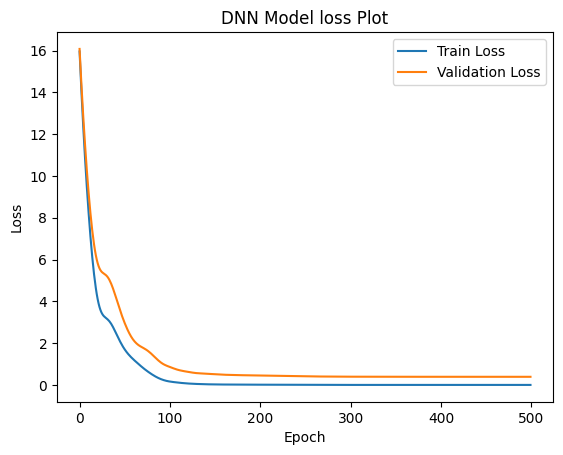

In [159]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')

plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [160]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=500, validation_data=(X_val,y_val),callbacks=callbacks_list)

Epoch 1/500
1/1 [==============================] - 0s 376ms/step - loss: 18.5809 - mse: 18.5809 - val_loss: 18.4260 - val_mse: 18.4260
Epoch 2/500
1/1 [==============================] - 0s 20ms/step - loss: 17.5311 - mse: 17.5311 - val_loss: 17.4629 - val_mse: 17.4629
Epoch 3/500
1/1 [==============================] - 0s 22ms/step - loss: 16.5209 - mse: 16.5209 - val_loss: 16.5387 - val_mse: 16.5387
Epoch 4/500
1/1 [==============================] - 0s 21ms/step - loss: 15.5491 - mse: 15.5491 - val_loss: 15.6521 - val_mse: 15.6521
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 14.6136 - mse: 14.6136 - val_loss: 14.8029 - val_mse: 14.8029
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 13.7143 - mse: 13.7143 - val_loss: 13.9896 - val_mse: 13.9896
Epoch 7/500
1/1 [==============================] - 0s 22ms/step - loss: 12.8512 - mse: 12.8512 - val_loss: 13.2115 - val_mse: 13.2115
Epoch 8/500
1/1 [==============================] - 0s 21ms/st

1/1 [==============================] - 0s 20ms/step - loss: 0.1032 - mse: 0.1032 - val_loss: 0.7669 - val_mse: 0.7669
Epoch 126/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0993 - mse: 0.0993 - val_loss: 0.7589 - val_mse: 0.7589
Epoch 127/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0955 - mse: 0.0955 - val_loss: 0.7510 - val_mse: 0.7510
Epoch 128/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0918 - mse: 0.0918 - val_loss: 0.7433 - val_mse: 0.7433
Epoch 129/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0882 - mse: 0.0882 - val_loss: 0.7360 - val_mse: 0.7360
Epoch 130/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0848 - mse: 0.0848 - val_loss: 0.7290 - val_mse: 0.7290
Epoch 131/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0815 - mse: 0.0815 - val_loss: 0.7224 - val_mse: 0.7224
Epoch 132/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0783 - mse: 0.

1/1 [==============================] - 0s 20ms/step - loss: 0.0044 - mse: 0.0044 - val_loss: 0.4979 - val_mse: 0.4979
Epoch 250/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.4973 - val_mse: 0.4973
Epoch 251/500
1/1 [==============================] - 0s 21ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 0.4967 - val_mse: 0.4967
Epoch 252/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.4961 - val_mse: 0.4961
Epoch 253/500
1/1 [==============================] - 0s 19ms/step - loss: 0.0039 - mse: 0.0039 - val_loss: 0.4955 - val_mse: 0.4955
Epoch 254/500
1/1 [==============================] - 0s 20ms/step - loss: 0.0038 - mse: 0.0038 - val_loss: 0.4949 - val_mse: 0.4949
Epoch 255/500
1/1 [==============================] - 0s 22ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.4944 - val_mse: 0.4944
Epoch 256/500
1/1 [==============================] - 0s 18ms/step - loss: 0.0036 - mse: 0.

Epoch 310/500
1/1 [==============================] - 0s 19ms/step - loss: 4.0411e-04 - mse: 4.0411e-04 - val_loss: 0.4725 - val_mse: 0.4725
Epoch 311/500
1/1 [==============================] - 0s 18ms/step - loss: 3.8631e-04 - mse: 3.8631e-04 - val_loss: 0.4722 - val_mse: 0.4722
Epoch 312/500
1/1 [==============================] - 0s 19ms/step - loss: 3.6923e-04 - mse: 3.6923e-04 - val_loss: 0.4720 - val_mse: 0.4720
Epoch 313/500
1/1 [==============================] - 0s 20ms/step - loss: 3.5285e-04 - mse: 3.5285e-04 - val_loss: 0.4718 - val_mse: 0.4718
Epoch 314/500
1/1 [==============================] - 0s 22ms/step - loss: 3.3715e-04 - mse: 3.3715e-04 - val_loss: 0.4715 - val_mse: 0.4715
Epoch 315/500
1/1 [==============================] - 0s 19ms/step - loss: 3.2212e-04 - mse: 3.2212e-04 - val_loss: 0.4713 - val_mse: 0.4713
Epoch 316/500
1/1 [==============================] - 0s 21ms/step - loss: 3.0775e-04 - mse: 3.0775e-04 - val_loss: 0.4711 - val_mse: 0.4711
Epoch 317/500
1/1 [=

1/1 [==============================] - 0s 19ms/step - loss: 7.3032e-06 - mse: 7.3032e-06 - val_loss: 0.4638 - val_mse: 0.4638
Epoch 427/500
1/1 [==============================] - 0s 20ms/step - loss: 7.1350e-06 - mse: 7.1350e-06 - val_loss: 0.4638 - val_mse: 0.4638
Epoch 428/500
1/1 [==============================] - 0s 19ms/step - loss: 6.9709e-06 - mse: 6.9709e-06 - val_loss: 0.4638 - val_mse: 0.4638
Epoch 429/500
1/1 [==============================] - 0s 20ms/step - loss: 6.8108e-06 - mse: 6.8108e-06 - val_loss: 0.4638 - val_mse: 0.4638
Epoch 430/500
1/1 [==============================] - 0s 20ms/step - loss: 6.6551e-06 - mse: 6.6551e-06 - val_loss: 0.4637 - val_mse: 0.4637
Epoch 431/500
1/1 [==============================] - 0s 21ms/step - loss: 6.5026e-06 - mse: 6.5026e-06 - val_loss: 0.4637 - val_mse: 0.4637
Epoch 432/500
1/1 [==============================] - 0s 20ms/step - loss: 6.3521e-06 - mse: 6.3521e-06 - val_loss: 0.4637 - val_mse: 0.4637
Epoch 433/500
1/1 [===============

In [161]:
test_loss, test_mse=hypermodel.evaluate(X_test,y_test)

1/1 [==============================] - 0s 12ms/step - loss: 2.1900 - mse: 2.1900


In [162]:
y_pred=model.predict(X_test)
y_pred

array([[4.627038  , 0.86391526],
       [5.191246  , 7.3953743 ],
       [1.0395389 , 3.390932  ],
       [1.5672352 , 4.214711  ],
       [4.708387  , 1.641217  ],
       [2.8412971 , 5.52182   ],
       [1.937015  , 4.1880474 ],
       [5.721716  , 6.5496135 ]], dtype=float32)

In [163]:
y_test=pd.DataFrame(y_test,columns=['x','y'])
y_pred=pd.DataFrame(y_pred, columns=['predicted_x','predicted_y'])

In [164]:
df_final = pd.DataFrame()
df_final = pd.concat([y_pred, y_test], axis=1)
df_final

,predicted_x,predicted_y,x,y
0,4.627038,0.863915,6,1
1,5.191246,7.395374,6,7
2,1.039539,3.390932,1,5
3,1.567235,4.214711,2,6
4,4.708387,1.641217,5,3
5,2.841297,5.521820,4,7
6,1.937015,4.188047,1,7
7,5.721716,6.549613,4,8


In [135]:
test_loss, test_mse=model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 1.9449 - mse: 1.9449


In [115]:
#y_pred=model.predict(X_test)
#y_pred

In [116]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))


Mean Squared Error (MSE) on new data in m: 2.20
Root Mean Squared Error (RMSE) on new data in m: 1.48
